In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
num_iter = 300
save_freq = 5

In [3]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 22s 2us/step


In [4]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (60000, 28, 28)
y_train (60000,)
x_test (10000, 28, 28)
y_test (10000,)


 class : 5


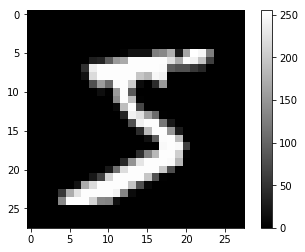

In [5]:
index = 0
print (" class :", y_train[index])

plt.imshow(x_train[index], cmap = 'gray')
plt.colorbar()

In [6]:
def model_LeCun5(image, act=tf.nn.relu):
    C1 = tf.layers.conv2d(inputs = image, filters = 6, kernel_size=5,
                         padding = 'same', activation = act)
    S2 = tf.layers.max_pooling2d(C1, pool_size = 2, strides =2)
    
    C3 = tf.layers.conv2d(S2, 12, 5, padding ='valid', activation = act)
    S4 = tf.layers.max_pooling2d(C3, 2,2)
    C5 = tf.layers.conv2d(S4, 120, 5, activation =act)
    flatten = tf.layers.flatten(C5)

    F6 = tf.layers.dense(flatten, units = 84, activation = act)
    output = tf.layers.dense(F6, 10)
    
    print(image)
    print(C1)
    print(S2)
    print(C3)
    print(S4)
    print(C5)
    print(flatten)
    print(F6)
    print(output)
    
    return output

In [7]:
tf.reset_default_graph()

input_image = tf.placeholder(tf.float32, [None,28,28,1])
label_y = tf.placeholder(tf.int32, [None])

predict_y = model_LeCun5(input_image, act=tf.nn.tanh)
argmax_y = tf.argmax(predict_y, axis = 1)

#####

loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
    logits=predict_y, labels = label_y))
opt = tf.train.AdamOptimizer(0.0001)
train_op = opt.minimize(loss)

#####
sess = tf.Session()
sess.run(tf.global_variables_initializer())

losses_tanh = []

for iteraion in range(num_iter+1):
    indices = np.random.randint(60000, size = 1000)
    batch_x = x_train[indices]
    batch_y = y_train[indices]
    
    batch_x = np.expand_dims(batch_x, axis = -1)
    
    _ = sess.run(train_op, feed_dict = {input_image:batch_x, label_y:batch_y})
    
    if iteraion % save_freq == 0:
        _loss, _argmax = sess.run([loss, argmax_y], feed_dict = {input_image:batch_x, label_y:batch_y})
        losses_tanh.append(_loss)
        print("============= iteraion", iteraion," =============")
        print("batch loss", _loss)
        print("예측 5개:", _argmax[:5])
        print("정답 5개:", batch_y[:5])

Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.max_pooling2d instead.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.dense instead.
Tensor("Placeholder:0", shape=(?, 28, 28, 1), dtype=float32)
Tensor("conv2d/Tanh:0", shape=(?, 28, 28, 6), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 14, 14, 6), dtype=float32)
Tensor("conv2d_1/Tanh:0", shape=(?, 10, 10, 12), dtype=float32)
Tensor("max_pooling2d_1/MaxPool:0", shape=(?, 5, 5, 12), dtype=float32)
Tensor("conv2d_2/Tanh:0", shape=(?, 1, 1, 120), dtype=float32)
Tensor("flatten/Reshape:0", shape=(?, 120), dtype=float32)
Tensor("dense/Tanh:0", shape=(?, 84), dtype=float32)
Tensor("dense_1/BiasAdd:0", shape=(?, 10), dtype=float32)
============= iteraion 0  =============
batch loss 2.330403
예측 5개: [2 2 2 2 5]
정답 5개: [6 0 8 6 1]
============= iteraio

In [ ]:
tf.reset_default_graph()

input_image = tf.placeholder(tf.float32, [None,28,28,1])
label_y = tf.placeholder(tf.int32, [None])

predict_y = model_LeCun5(input_image, act=tf.nn.relu)
argmax_y = tf.argmax(predict_y, axis = 1)

#####

loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
    logits=predict_y, labels = label_y))
opt = tf.train.AdamOptimizer(0.0001)
train_op = opt.minimize(loss)

#####
sess = tf.Session()
sess.run(tf.global_variables_initializer())

losses_relu = []

for iteraion in range(num_iter+1):
    indices = np.random.randint(60000, size = 1000)
    batch_x = x_train[indices]
    batch_y = y_train[indices]
    
    batch_x = np.expand_dims(batch_x, axis = -1)
    
    _ = sess.run(train_op, feed_dict = {input_image:batch_x, label_y:batch_y})
    
    if iteraion % save_freq == 0:
        _loss, _argmax = sess.run([loss, argmax_y], feed_dict = {input_image:batch_x, label_y:batch_y})
        losses_relu.append(_loss)
        print("============= iteraion", iteraion," =============")
        print("batch loss", _loss)
        print("예측 5개:", _argmax[:5])
        print("정답 5개:", batch_y[:5])

In [ ]:
plt.figure()
plt.title("0~300")
x = np.arange(0, num_iter+1, save_freq)
plt.plot(x, losses_tanh)
plt.plot(x, losses_relu)

plt.legend(['tanh', 'relu'], loc = 'upper right')
plt.show()

plt.figure()
plt.title("Zoom x-axis")

skip = 10
x = np.arange(skip*save_freq, num_iter+1, save_freq)
plt.plot(x, losses_tanh[skip:])
plt.plot(x, losses_relu[skip:])

plt.legend(['tanh', 'relu'], loc = 'upper right')

plt.show()

In [ ]:
index = 31
test_img = x_test[index]
plt.imshow(test_img, cmap='gray')

test_img = np.expand_dims(test_img, axis =-1)
test_img = np.expand_dims(test_img, axis =0)

_predict = sess.run(predict_y, feed_dict = {input_image:test_img})
print("0~9 probability : ", _predict)
print("predict : ",np.argmax(_predict))